In [16]:
#If i cahnge randomstate the output changes quite some, might need to get an average of that.
#also, If i train the program with the data from all the matches it might go way better. So I would need to combine 
#the data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import sklearn.metrics as skm
import sklearn
from sklearn.model_selection import train_test_split
dataset = pd.read_csv('C:/Users/mailv/OneDrive/Documents/Machine_learning/season-0910_csv.csv')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import random
random.seed(12)

#This is only for home team
# X = dataset[['HS', 'HST','HC','HF','HY','HR']]
y = dataset['FTR']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

datafiles=['C:/Users/mailv/OneDrive/Documents/Machine_learning/season-0910_csv.csv','C:/Users/mailv/OneDrive/Documents/Machine_learning/season-1011_csv.csv',
'C:/Users/mailv/OneDrive/Documents/Machine_learning/season-1112_csv.csv', 'C:/Users/mailv/OneDrive/Documents/Machine_learning/season-1213_csv.csv',
'C:/Users/mailv/OneDrive/Documents/Machine_learning/season-1314_csv.csv','C:/Users/mailv/OneDrive/Documents/Machine_learning/season-1415_csv.csv',
'C:/Users/mailv/OneDrive/Documents/Machine_learning/season-1516_csv.csv','C:/Users/mailv/OneDrive/Documents/Machine_learning/season-1617_csv.csv',
'C:/Users/mailv/OneDrive/Documents/Machine_learning/season-1718_csv.csv','C:/Users/mailv/OneDrive/Documents/Machine_learning/season-1819_csv.csv']
    

"""
Stashing stuff
print(pd.crosstab(y_test, y_pred_GNB, rownames=['True'], colnames=['Predicted'], margins=True))

print("Accuracy score for Logistic Regression is:", skm.accuracy_score(y_test, y_pred_GNB)*100,'%')

print(pd.crosstab(y_test, y_pred_LR, rownames=['True'], colnames=['Predicted'], margins=True))

print("Accuracy score for Logistic Regression is:", skm.accuracy_score(y_test, y_pred_LR)*100,'%')

print(pd.crosstab(y_test, y_pred_svc, rownames=['True'], colnames=['Predicted'], margins=True))

print("Accuracy score for Logistic Regression is:", skm.accuracy_score(y_test, y_pred_svc)*100,'%')

"""

'\nStashing stuff\nprint(pd.crosstab(y_test, y_pred_GNB, rownames=[\'True\'], colnames=[\'Predicted\'], margins=True))\n\nprint("Accuracy score for Logistic Regression is:", skm.accuracy_score(y_test, y_pred_GNB)*100,\'%\')\n\nprint(pd.crosstab(y_test, y_pred_LR, rownames=[\'True\'], colnames=[\'Predicted\'], margins=True))\n\nprint("Accuracy score for Logistic Regression is:", skm.accuracy_score(y_test, y_pred_LR)*100,\'%\')\n\nprint(pd.crosstab(y_test, y_pred_svc, rownames=[\'True\'], colnames=[\'Predicted\'], margins=True))\n\nprint("Accuracy score for Logistic Regression is:", skm.accuracy_score(y_test, y_pred_svc)*100,\'%\')\n\n'

In [17]:
def LogisticRegression(y,features,dataset):
       
    from sklearn.linear_model import LogisticRegression
    LR=LogisticRegression(max_iter=10000)
    
    X = dataset[features]
    y = dataset['FTR']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
    LR.fit(X_train,y_train)
    y_pred_LR=LR.predict(X_test)
    return skm.accuracy_score(y_test, y_pred_LR)*100
    


In [18]:
def GaussianNB (y,features,dataset):
    from sklearn.naive_bayes import GaussianNB 
    X = dataset[features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
    gnb = GaussianNB() 
    gnb.fit(X_train, y_train) 
    y_pred_GNB = gnb.predict(X_test) 
    return skm.accuracy_score(y_test, y_pred_GNB)*100



In [19]:
def SVC(y,features,dataset):
    from sklearn.svm import SVC
    X = dataset[features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
    svclassifier = SVC(kernel='linear')
    svclassifier.fit(X_train, y_train)
    y_pred_svc = svclassifier.predict(X_test)
    return skm.accuracy_score(y_test, y_pred_svc)*100


In [5]:
from itertools import chain, combinations
def all_subsets(ss):
    return chain(*map(lambda x: combinations(ss, x), range(0, len(ss)+1)))
max_iter=10000

list_features=['HS', 'HST','HC','HF','HY','HR']
home_accuracy_scores=[]
home_picked_features=[]
count=0
for j in range(len(datafiles)):
    dataset=pd.read_csv(datafiles[j])
    y = dataset['FTR']
#     print(dataset[['HS', 'HST','HC','HF','HY','HR']].head())
    for subset in all_subsets(list_features):
        subset=list(subset)
        if len(subset)==0:
            print("Calculations are at {} to {}%".format(count*10, count*10+10)) #starts
        else:
            home_accuracy_scores.append(SVC(y,subset,dataset))
            home_accuracy_scores.append(LogisticRegression(y,subset,dataset))
            home_accuracy_scores.append(GaussianNB(y,subset,dataset))
            home_picked_features.append(subset)
    count+=1

# print("The list:",list_accuracy_scores)
print("Length of list:", len(home_accuracy_scores))
print("Length picked features:",len(home_picked_features))
print("Max accuracy: ", max(home_accuracy_scores), "     Corresponding index:",home_accuracy_scores.index(max(home_accuracy_scores)))
# print(list_picked_features)
   

Calculations are at 0 to 10%
Calculations are at 10 to 20%
Calculations are at 20 to 30%
Calculations are at 30 to 40%
Calculations are at 40 to 50%
Calculations are at 50 to 60%
Calculations are at 60 to 70%
Calculations are at 70 to 80%
Calculations are at 80 to 90%
Calculations are at 90 to 100%
Length of list: 1890
Length picked features: 630
Max accuracy:  61.40350877192983      Corresponding index: 821


In [6]:
best_features=home_picked_features[(821//3)]
cool = home_accuracy_scores.index(max(home_accuracy_scores))%3
if cool==0:
    print("Support Vector Machine is the best way for predicting the data")
if cool==1:
    print("Logistic Regression is the best way for predicting the data")
if cool==2:
    print("Naive Bayes is the best way for predicting the data")
# 821%3
print("The best features are:", best_features)

Naive Bayes is the best way for predicting the data
The best features are: ['HS', 'HST', 'HC']


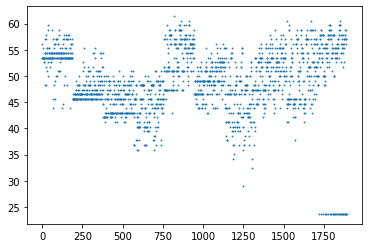

'\nSo you see that it differs quite strongly per season. The combinations of the features are always constant. It is 1890 in length because 6!/([1,2,3,4,5,6]-r)!)=1890. \n1890/10=189 so it is a new season for every 189 step in x value. \n'

In [7]:
indices=list(range(1, (len(home_accuracy_scores)+1)))
plt.scatter(indices,home_accuracy_scores,s=0.7,cmap='viridis')
plt.show()
"""
So you see that it differs quite strongly per season. The combinations of the features are always constant. It is 1890 in length because 6!/([1,2,3,4,5,6]-r)!)=1890. 
1890/10=189 so it is a new season for every 189 step in x value. 
"""

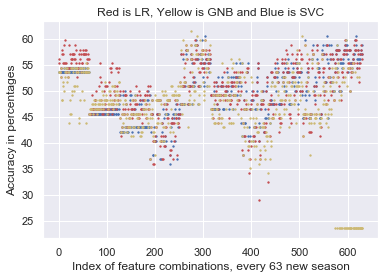

In [46]:
SVC_scores=[]
LR_scores=[]
GNB_scores=[]

for i in range(len(home_accuracy_scores)):
    if i%3==0:
        SVC_scores.append(home_accuracy_scores[i])
    if i%3==1:
        LR_scores.append(home_accuracy_scores[i])
    if i%3==2:
        GNB_scores.append(home_accuracy_scores[i])

specific_indices=list(range(1, int(len(home_accuracy_scores)/3+1)))
plt.scatter(specific_indices, SVC_scores, s=1.8, c='b')
plt.scatter(specific_indices, LR_scores, s=1.8, c='r')
plt.scatter(specific_indices, GNB_scores, s=1.8, c='y')
plt.xlabel('Index of feature combinations, every 63 new season')
plt.ylabel('Accuracy in percentages')
plt.title("Red is LR, Yellow is GNB and Blue is SVC")
plt.show()


In [9]:
wins=0
losses=0
draws=0
for j in range(len(datafiles)):
    dataset=pd.read_csv(datafiles[j])
    for i in range(len(y)):
        if y[i]=='H':
            wins+=1
        if y[i]=='A':
            losses+=1
        if y[i]=='D':
            draws+=1

print("Percentages of ",wins/(380*10)*100, losses/(380*10)*100, draws/(380*10)*100)
print(wins, draws, losses)

Percentages of  47.63157894736842 33.68421052631579 18.684210526315788
1810 710 1280


In [10]:
bigboiX=[]
bigboiY=[]
for j in range(len(datafiles)):
    dataset=pd.read_csv(datafiles[j])
    qw=dataset[['HS', 'HST', 'HC']]
    we=dataset['FTR']
    bigboiX.append(qw)
    bigboiY.append(we)
    
bigboiX = pd.concat(bigboiX)
bigboiY = pd.concat(bigboiY)

In [11]:
bigboiX, bigboiY

(     HS  HST  HC
 0    11    5   4
 1    17    9   5
 2    11    3   4
 3    26   12  12
 4     8    5   4
 ..   ..  ...  ..
 375  13    5   4
 376  26   10  11
 377  10    3   4
 378  11    3   7
 379  17    8   7
 
 [3800 rows x 3 columns], 0      A
 1      A
 2      A
 3      H
 4      A
       ..
 375    H
 376    A
 377    D
 378    D
 379    A
 Name: FTR, Length: 3800, dtype: object)

In [12]:
def bigboi_SVC(y,X):
    from sklearn.svm import SVC

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=1)
    svclassifier = SVC(kernel='linear')
    svclassifier.fit(X_train, y_train)
    y_pred_svc = svclassifier.predict(X_test)
    return skm.accuracy_score(y_test, y_pred_svc)*100

# def LogisticRegression(y,X):
#     from sklearn.linear_model import LogisticRegression
#     LR=LogisticRegression(max_iter=10000)
  
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
#     LR.fit(X_train,y_train)
#     y_pred_LR=LR.predict(X_test)
#     return skm.accuracy_score(y_test, y_pred_LR)*100

# def GaussianNB (y,X):
#     from sklearn.naive_bayes import GaussianNB 
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
#     gnb = GaussianNB() 
#     gnb.fit(X_train, y_train) 
#     y_pred_GNB = gnb.predict(X_test) 
#     return skm.accuracy_score(y_test, y_pred_GNB)*100


    

In [14]:
indices=list(range(1, 31))
home_features_accuracy={}

for k in range(int(len(home_picked_features)/10)):
    accuracy=[]
    for m in range(30):
        accuracy.append(home_accuracy_scores[k+63*m])
    home_features_accuracy['Features:{}'.format(home_picked_features[k])]= accuracy
        
#     plt.scatter(indices, accuracy)
#     plt.title('{}'.format(list_picked_features[k]))
#     plt.show()
        

   
        
    

In [20]:
means={}
for i in range(len(home_features_accuracy)):
    values= (home_features_accuracy['Features:{}'.format(home_picked_features[i])])
    values= values[21:30]
    means['{}'.format(home_picked_features[i])]=np.mean(values)

sorted_means=[]
for i in range(len(means)):
    sorted_means.append(means['{}'.format(home_picked_features[i])])

meanis=sorted(sorted_means,reverse=True)
top10={}
low10={}
for i in range(10):
    top10[(list(means.keys())[list(means.values()).index(meanis[i])])]=meanis[i]
for i in range(53,63):
    low10[(list(means.keys())[list(means.values()).index(meanis[i])])]=meanis[i]
# print(means)

In [21]:
top10, low10
    

({"['HS', 'HY', 'HR']": 56.140350877192986,
  "['HST', 'HC', 'HF']": 55.94541910331385,
  "['HST', 'HF', 'HY']": 55.653021442495124,
  "['HY']": 55.45808966861599,
  "['HST', 'HY', 'HR']": 55.0682261208577,
  "['HF', 'HY']": 54.873294346978554,
  "['HC', 'HF', 'HY']": 54.77582846003898,
  "['HST']": 54.678362573099406,
  "['HF']": 54.580896686159846},
 {"['HS', 'HST', 'HC', 'HF', 'HY', 'HR']": 44.73684210526316,
  "['HST', 'HR']": 44.639376218323584,
  "['HS', 'HF', 'HY', 'HR']": 44.54191033138402,
  "['HS', 'HST', 'HF', 'HY']": 43.76218323586745,
  "['HST', 'HC']": 42.98245614035088,
  "['HS', 'HC', 'HY']": 42.690058479532155,
  "['HS', 'HC', 'HF', 'HY']": 42.30019493177387,
  "['HS', 'HST', 'HC', 'HF', 'HY']": 40.64327485380116,
  "['HST', 'HC', 'HY', 'HR']": 39.57115009746589})

In [ ]:
# best_features=str(list(top10.keys()))
# new=""
# for i in range(len(best_features)):
#     if best_features[i]!='"':
#         #if best_features[i]!=\:
#         new+=best_features[i]
# new.split('], ')
        
            

In [24]:
home_picked_features.index(['HS','HST','HC'])

21

In [26]:
def DecisionTree(y,X):
    from sklearn.tree import DecisionTreeClassifier
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
    clf = DecisionTreeClassifier() 
    clf.fit(X_train, y_train) 
    y_pred_DT = clf.predict(X_test) 
    return skm.accuracy_score(y_test, y_pred_DT)*100

In [27]:
dataset=pd.read_csv(datafiles[9])
new_Y = dataset['FTR']
new_X = dataset[['HS', 'HST', 'HC']]


DecisionTree(new_Y,new_X)
    
    

43.859649122807014

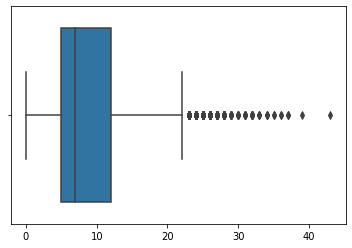

In [28]:
import seaborn as sns
sns.boxplot(x=bigboiX[['HS', 'HST', 'HC']])

In [29]:
import pandas as pd
def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]
reject_outliers(bigboiX[['HS']], m=2)

,HS
0,11.0
1,17.0
2,11.0
3,NaN
4,8.0
...,...
375,13.0
376,NaN
377,10.0
378,11.0


In [30]:
cokoe=bigboiX[['HS']]
tuple(cokoe)

('HS',)

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)


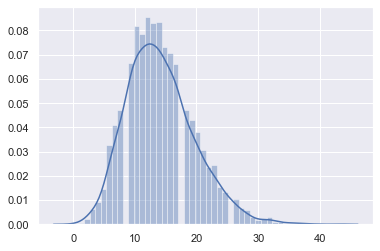

In [32]:
sns.distplot(bigboiX[['HS']])



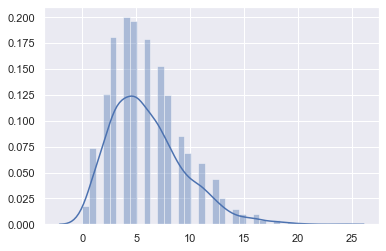

In [33]:
sns.distplot(bigboiX[['HST']])

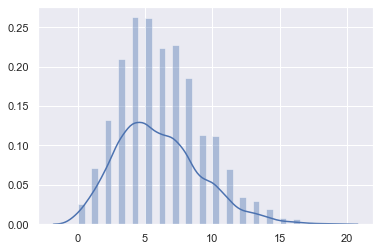

In [34]:
sns.distplot(bigboiX[['HC']] )



In [35]:
bigboiX[['HS']].max()

HS    43
dtype: int64

In [39]:
away_features=['AS', 'AST','AC','AF','AY','AR']
away_accuracy_scores=[]
away_picked_features=[]
count=0
for j in range(len(datafiles)):
    dataset=pd.read_csv(datafiles[j])
    y = dataset['FTR']
#     print(dataset[['HS', 'HST','HC','HF','HY','HR']].head())
    for subset in all_subsets(away_features):
        subset=list(subset)
        if len(subset)==0:
            print("Calculations are at {} to {}%".format(count*10, count*10+10)) #starts
        else:
            away_accuracy_scores.append(SVC(y,subset,dataset))
            away_accuracy_scores.append(LogisticRegression(y,subset,dataset))
            away_accuracy_scores.append(GaussianNB(y,subset,dataset))
            away_picked_features.append(subset)
    count+=1

# print("The list:",list_accuracy_scores)
print("Length of list:", len(away_accuracy_scores))
print("Length picked features:",len(away_picked_features))
print("Max accuracy: ", max(away_accuracy_scores), "     Corresponding index:",away_accuracy_scores.index(max(away_accuracy_scores)))
# print(list_picked_features)
   

Calculations are at 0 to 10%
Calculations are at 10 to 20%
Calculations are at 20 to 30%
Calculations are at 30 to 40%
Calculations are at 40 to 50%
Calculations are at 50 to 60%
Calculations are at 60 to 70%
Calculations are at 70 to 80%
Calculations are at 80 to 90%
Calculations are at 90 to 100%
Length of list: 1890
Length picked features: 630
Max accuracy:  66.66666666666666      Corresponding index: 799


In [45]:
home_best_features=home_picked_features[((home_accuracy_scores.index(max(home_accuracy_scores)))//3)]
cool = home_accuracy_scores.index(max(home_accuracy_scores))%3
if cool==0:
    print("Support Vector Machine is the best way for predicting the home data")
if cool==1:
    print("Logistic Regression is the best way for predicting the home data")
if cool==2:
    print("Naive Bayes is the best way for predicting the home data")
print("The best home features are:", home_best_features)

away_best_features=away_picked_features[((away_accuracy_scores.index(max(away_accuracy_scores)))//3)]
cool = away_accuracy_scores.index(max(away_accuracy_scores))%3
if cool==0:
    print("Support Vector Machine is the best way for predicting the away data")
if cool==1:
    print("Logistic Regression is the best way for predicting the away data")
if cool==2:
    print("Naive Bayes is the best way for predicting the away data")
print("The best away features are:", away_best_features)


Naive Bayes is the best way for predicting the home data
The best home features are: ['HS', 'HST', 'HC']
Logistic Regression is the best way for predicting the away data
The best away features are: ['AST', 'AR']


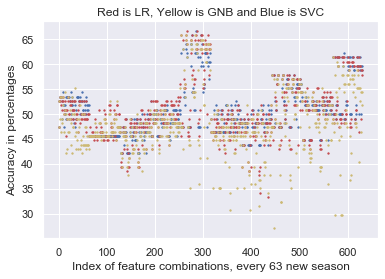

In [41]:
away_SVC_scores=[]
away_LR_scores=[]
away_GNB_scores=[]

for i in range(len(away_accuracy_scores)):
    if i%3==0:
        away_SVC_scores.append(away_accuracy_scores[i])
    if i%3==1:
        away_LR_scores.append(away_accuracy_scores[i])
    if i%3==2:
        away_GNB_scores.append(away_accuracy_scores[i])

specific_indices=list(range(1, int(len(away_accuracy_scores)/3+1)))
plt.scatter(specific_indices, away_SVC_scores, s=1.8, c='b')
plt.scatter(specific_indices, away_LR_scores, s=1.8, c='r')
plt.scatter(specific_indices, away_GNB_scores, s=1.8, c='y')
plt.xlabel('Index of feature combinations, every 63 new season')
plt.ylabel('Accuracy in percentages')
plt.title("Red is LR, Yellow is GNB and Blue is SVC")
plt.show()

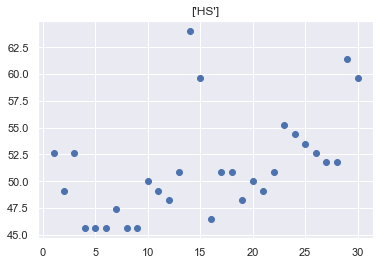

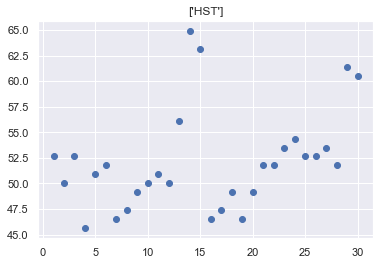

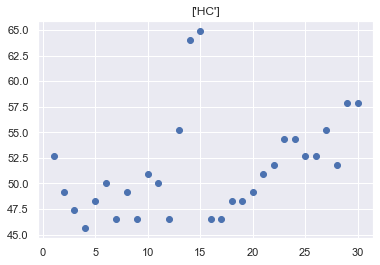

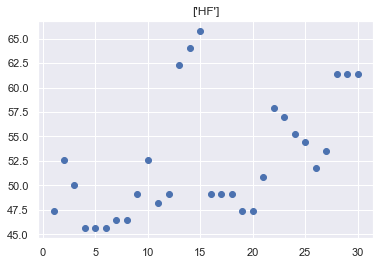

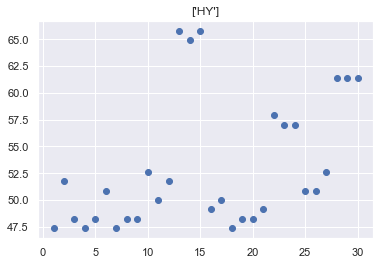

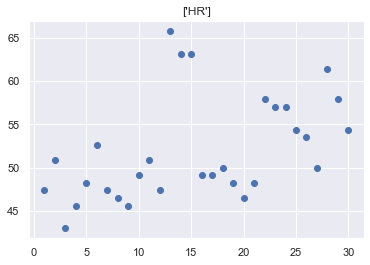

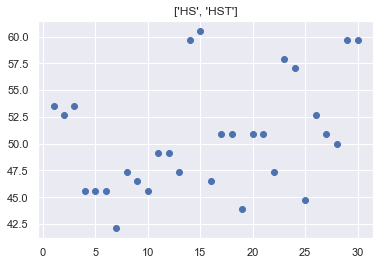

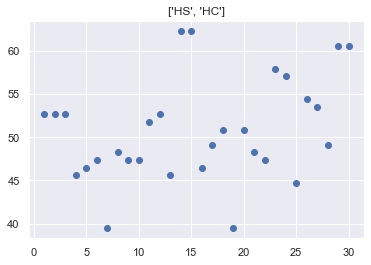

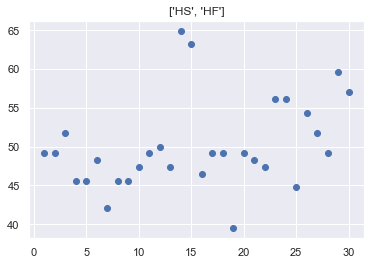

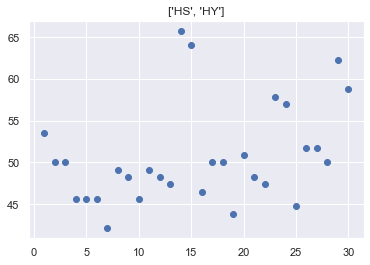

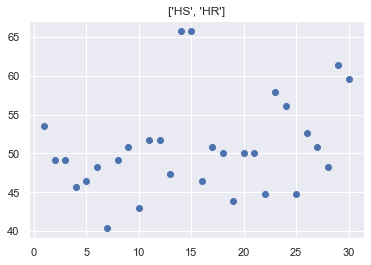

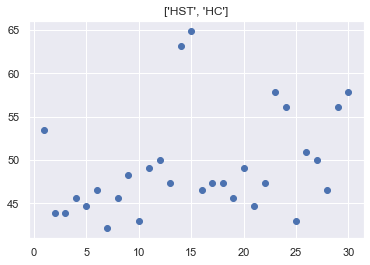

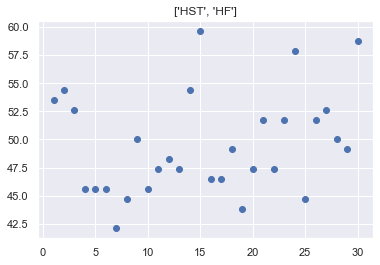

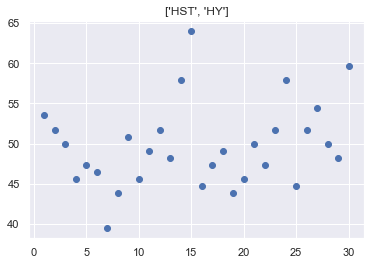

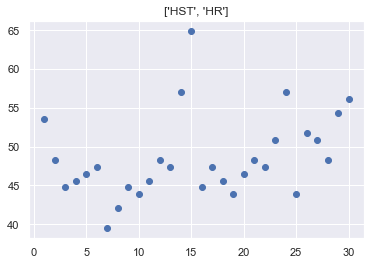

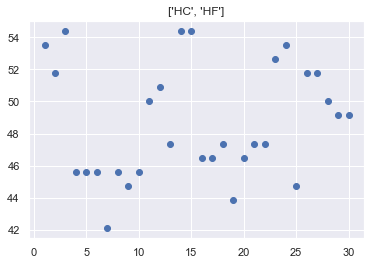

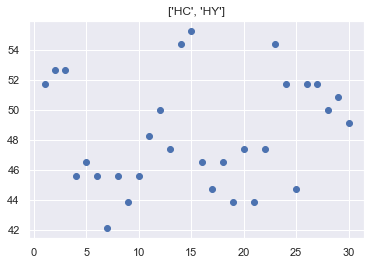

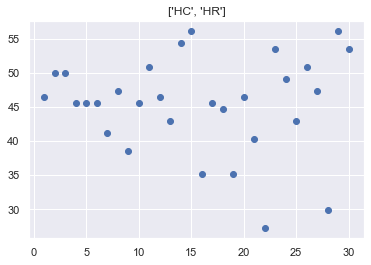

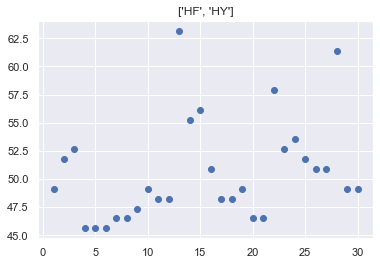

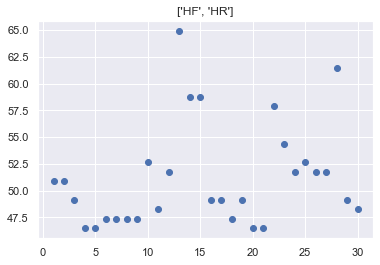

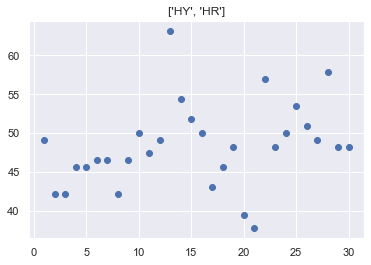

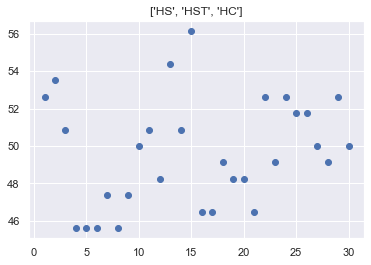

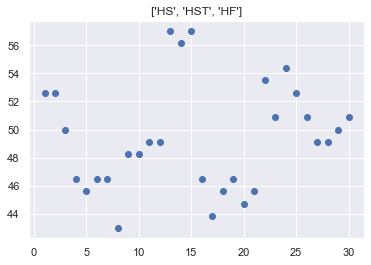

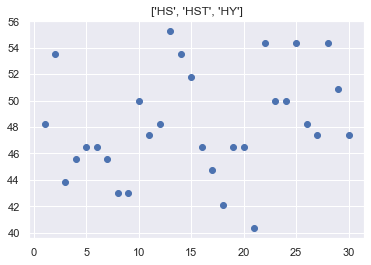

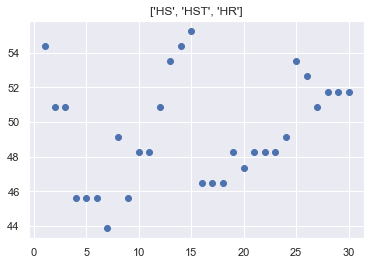

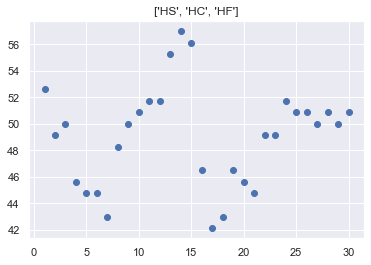

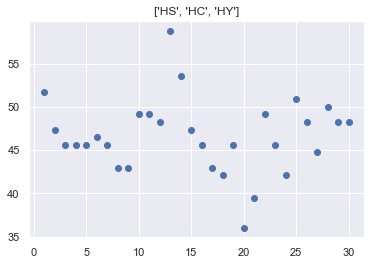

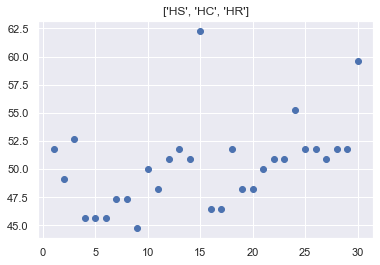

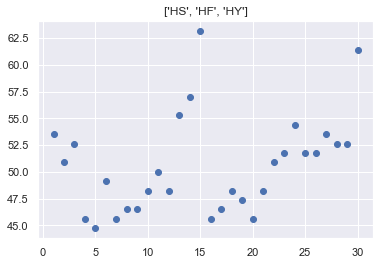

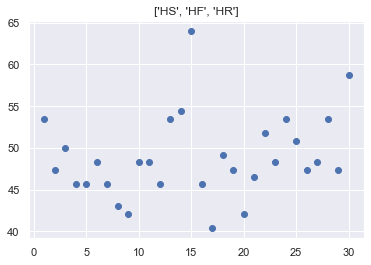

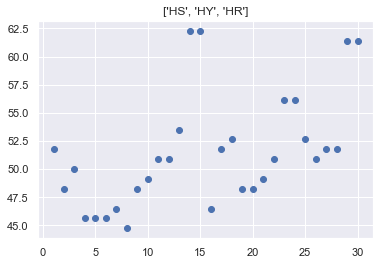

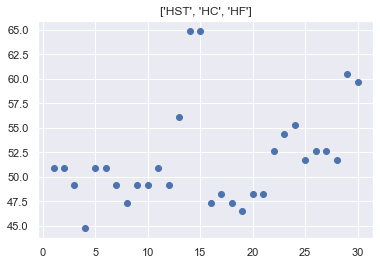

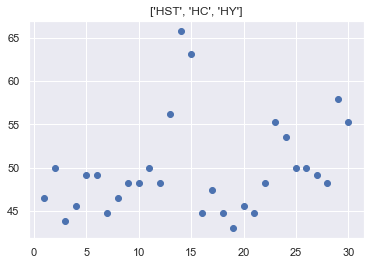

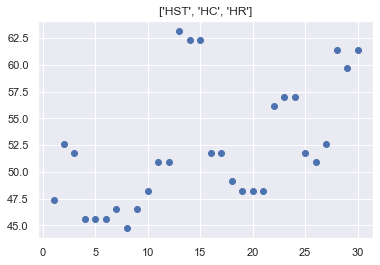

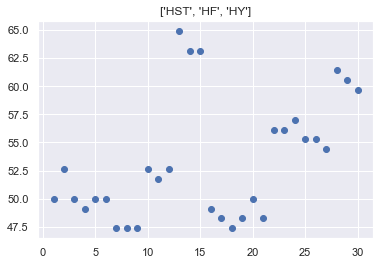

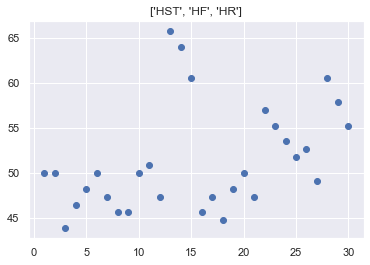

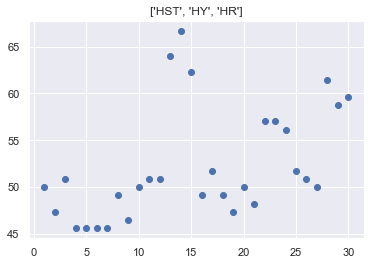

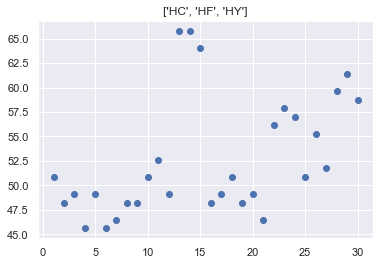

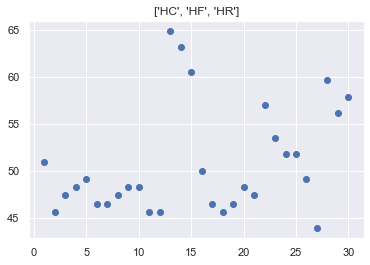

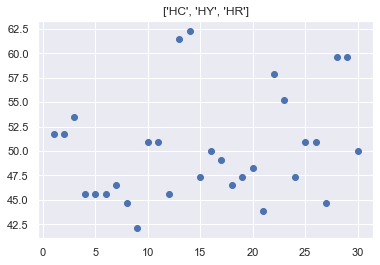

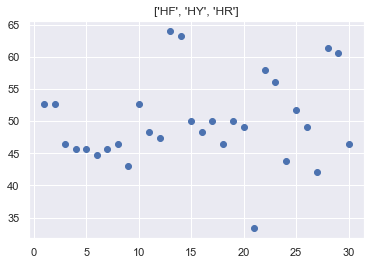

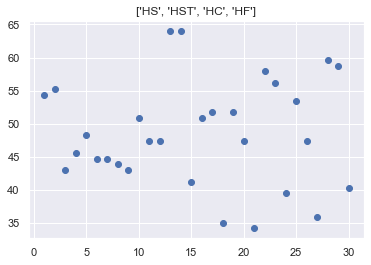

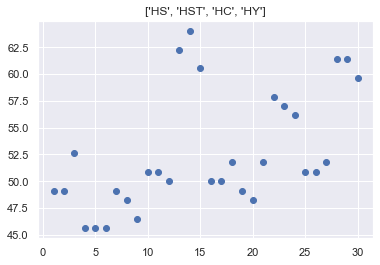

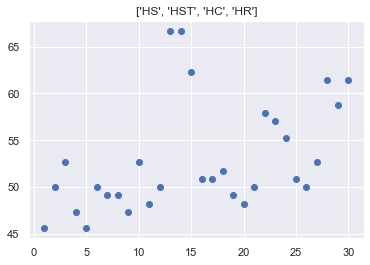

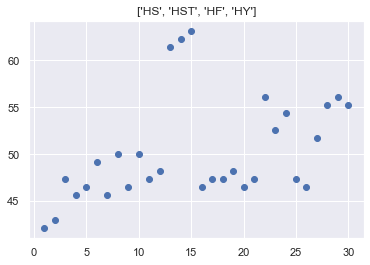

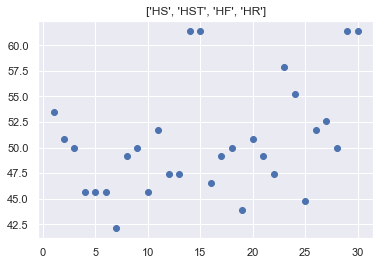

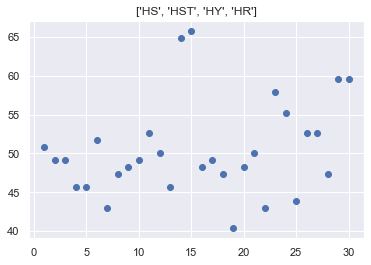

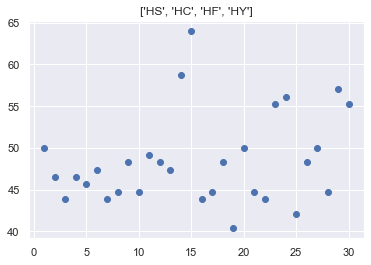

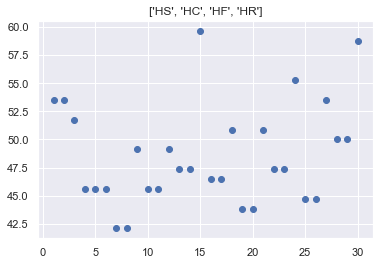

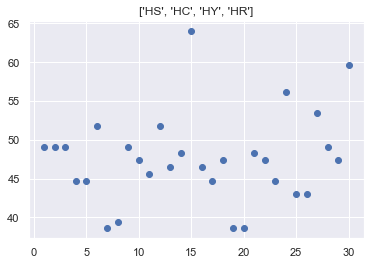

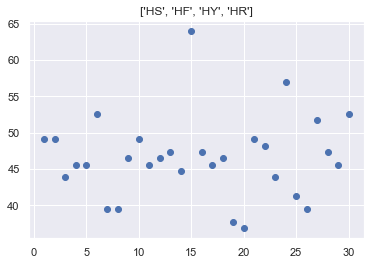

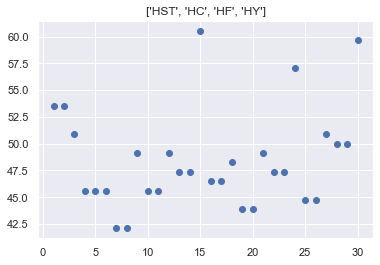

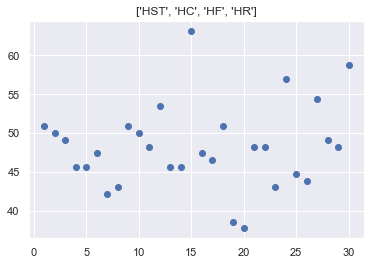

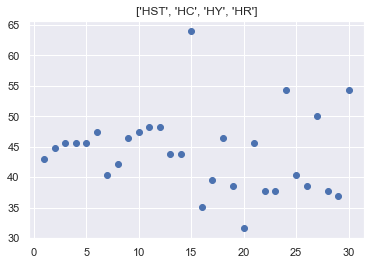

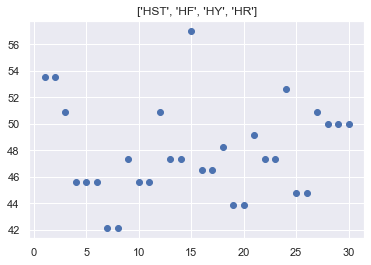

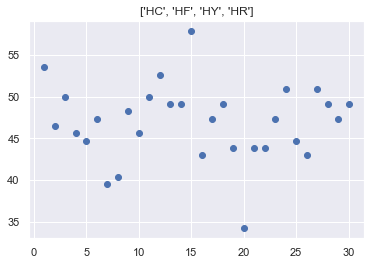

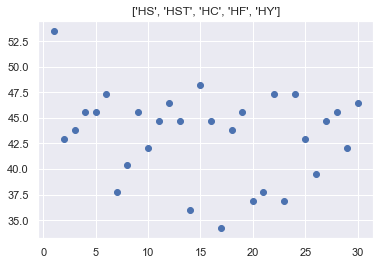

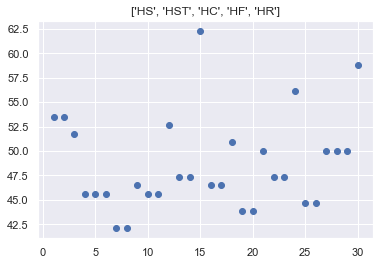

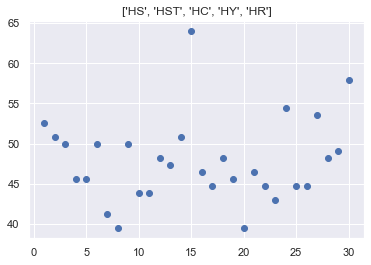

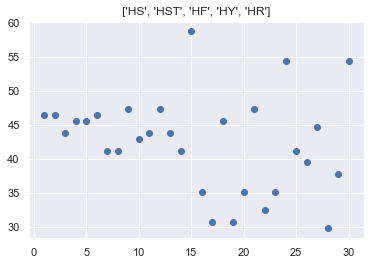

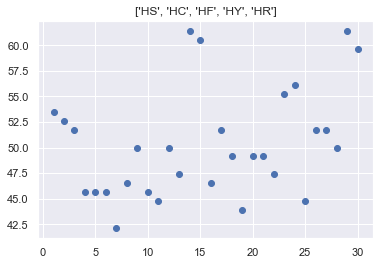

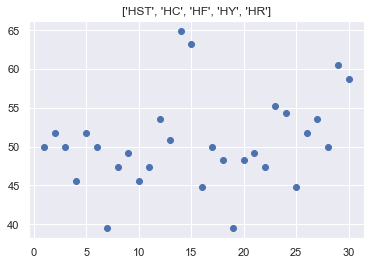

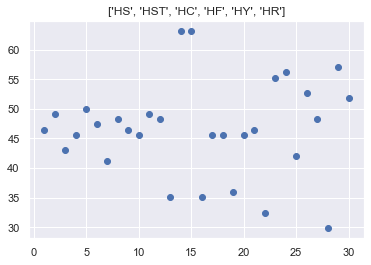

In [71]:
indices=list(range(1, 31))
away_features_accuracy={}

for k in range(int(len(away_picked_features)/10)):
    accuracy=[]
    for m in range(30):
        accuracy.append(away_accuracy_scores[k+63*m])
    away_features_accuracy['Features:{}'.format(away_picked_features[k])]= accuracy
        
    plt.scatter(indices, accuracy)
    plt.title('{}'.format(home_picked_features[k]))
    plt.show()

In [52]:
away_means={}
for i in range(len(away_features_accuracy)):
    values= (away_features_accuracy['Features:{}'.format(away_picked_features[i])])
    values=values[21:]
    away_means['{}'.format(away_picked_features[i])]=np.mean(values)

away_sorted_means=[]
for i in range(len(away_means)):
    away_sorted_means.append(away_means['{}'.format(away_picked_features[i])])

away_meanis=sorted(away_sorted_means,reverse=True)
away_top10={}
away_low10={}
for i in range(10):
    away_top10[(list(away_means.keys())[list(away_means.values()).index(away_meanis[i])])]=away_meanis[i]home_top
for i in range(53,63):
    away_low10[(list(away_means.keys())[list(away_means.values()).index(away_meanis[i])])]=away_meanis[i]
away_top10, away_low10

({"['AST', 'AF', 'AY']": 57.30994152046784,
  "['AF']": 57.1150097465887,
  "['AY']": 56.72514619883041,
  "['AC', 'AF', 'AY']": 56.53021442495127,
  "['AST', 'AC', 'AR']": 56.432748538011694,
  "['AS', 'AST', 'AC', 'AY']": 56.33528265107213,
  "['AS', 'AST', 'AC', 'AR']": 56.14035087719298,
  "['AR']": 55.945419103313846,
  "['AST', 'AY', 'AR']": 55.84795321637427,
  "['AST', 'AF', 'AR']": 54.77582846003899},
 {"['AS', 'AST', 'AC', 'AY', 'AR']": 48.927875243664715,
  "['AST', 'AF', 'AY', 'AR']": 48.635477582846,
  "['AS', 'AF', 'AY', 'AR']": 47.465886939571156,
  "['AS', 'AC', 'AY']": 47.46588693957115,
  "['AC', 'AF', 'AY', 'AR']": 47.368421052631575,
  "['AS', 'AST', 'AC', 'AF', 'AY', 'AR']": 47.27095516569201,
  "['AC', 'AR']": 45.6140350877193,
  "['AS', 'AST', 'AC', 'AF', 'AY']": 43.66471734892788,
  "['AST', 'AC', 'AY', 'AR']": 43.07992202729045,
  "['AS', 'AST', 'AF', 'AY', 'AR']": 41.033138401559455})

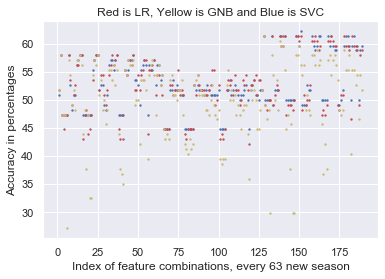

In [67]:
last_three_season_indices=list(range(1, int(len(away_accuracy_scores)/30*3+1)))
plt.scatter(last_three_season_indices, away_SVC_scores[-189:], s=1.8, c='b')
plt.scatter(last_three_season_indices, away_LR_scores[-189:], s=1.8, c='r')
plt.scatter(last_three_season_indices, away_GNB_scores[-189:], s=1.8, c='y')
plt.xlabel('Index of feature combinations, every 63 new season')
plt.ylabel('Accuracy in percentages')
plt.title("Red is LR, Yellow is GNB and Blue is SVC")
plt.show()

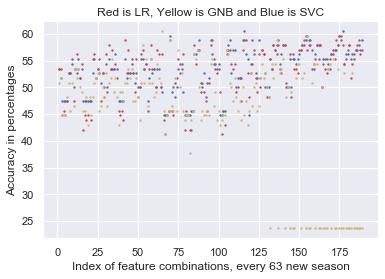

In [69]:
last_three_season_indices=list(range(1, int(len(home_accuracy_scores)/30*3+1)))
plt.scatter(last_three_season_indices, SVC_scores[-189:], s=1.8, c='b')
plt.scatter(last_three_season_indices, LR_scores[-189:], s=1.8, c='r')
plt.scatter(last_three_season_indices, GNB_scores[-189:], s=1.8, c='y')
plt.xlabel('Index of feature combinations, every 63 new season')
plt.ylabel('Accuracy in percentages')
plt.title("Red is LR, Yellow is GNB and Blue is SVC")
plt.show()